In [1]:
import numpy as np
from functools import reduce
import math


In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
def HSM2D(a1,b1,x10,y10,a2,b2,x20,y20,steps):
    x01=x10
    y01=y10
    x02=x20
    y02=y20
    x1s = []
    y1s = []
    x2s = []
    y2s = []
    for i in range(steps):
        x1= (1 - a1 * math.sin(x01) + y01)%1
        y1= (b1 * x01) % 1
        x2= (1 - a2 * math.sin(x02) + y02)%1
        y2= (b2 * x02) % 1
        x01=x1
        x02=x2
        y01=y1
        y02=y2
        x1s.append(x1)
        x2s.append(x2)
        y1s.append(y1)
        y2s.append(y2)
    return x1s, y1s, x2s, y2s
        

In [4]:
def DNAencode(rule, R):
    rules=[{0:'A', 1:'G', 2:'C', 3:'T'},
          {0:'A', 1:'C', 2:'G', 3:'T'},
          {0:'T', 1:'G', 2:'C', 3:'A'},
          {0:'T', 1:'C', 2:'G', 3:'A'},
          {0:'C', 1:'T', 2:'A', 3:'G'},
          {0:'C', 1:'A', 2:'T', 3:'G'},
          {0:'G', 1:'T', 2:'A', 3:'C'},
          {0:'G', 1:'A', 2:'T', 3:'C'}]
    encodeString = []
    
    rule_index = 0
    
    for r in R:
        str = ''
        
        for i in range(4):
            str = str + (rules[rule[rule_index]-1][r%4])
            r=math.floor(r/4);
        encodeString.append(str)
        rule_index=rule_index+1
        
    return encodeString

In [5]:
def DNAencode1(rule, R):
    rules=[{0:'A', 1:'G', 2:'C', 3:'T'},
          {0:'A', 1:'C', 2:'G', 3:'T'},
          {0:'T', 1:'G', 2:'C', 3:'A'},
          {0:'T', 1:'C', 2:'G', 3:'A'},
          {0:'C', 1:'T', 2:'A', 3:'G'},
          {0:'C', 1:'A', 2:'T', 3:'G'},
          {0:'G', 1:'T', 2:'A', 3:'C'},
          {0:'G', 1:'A', 2:'T', 3:'C'}]

    str = ''
        
    for i in range(4):
        str = str + (rules[rule-1][int(R)%4])
        R=math.floor(R/4);
        
    return str

In [6]:
def DNAdecode(rule, R):
    rules = [{'A':0, 'T':3, 'C':2, 'G':1 },
         {'A':0, 'T':3, 'C':1, 'G':2 },
         {'A':3, 'T':0, 'C':2, 'G':1 },
         {'A':3, 'T':0, 'C':1, 'G':2 },
         {'A':2, 'T':1, 'C':0, 'G':3 },
         {'A':1, 'T':2, 'C':0, 'G':3 },
         {'A':2, 'T':1, 'C':3, 'G':0 },
         {'A':1, 'T':2, 'C':3, 'G':0 }]
    
    decodeDNA = []
    
    rule_index=0
    
    for DNAel in R:
        el = 0
        mul=1
        for i in range(4):
            el = el + rules[rule[rule_index]-1][DNAel[i]] * mul
            mul=mul*4
        decodeDNA.append(el)
        
        rule_index=rule_index+1
        
    return decodeDNA

In [7]:
def DNAdecode1(rule, R):
    rules = [{'A':0, 'T':3, 'C':2, 'G':1 },
         {'A':0, 'T':3, 'C':1, 'G':2 },
         {'A':3, 'T':0, 'C':2, 'G':1 },
         {'A':3, 'T':0, 'C':1, 'G':2 },
         {'A':2, 'T':1, 'C':0, 'G':3 },
         {'A':1, 'T':2, 'C':0, 'G':3 },
         {'A':2, 'T':1, 'C':3, 'G':0 },
         {'A':1, 'T':2, 'C':3, 'G':0 }]
    
    el = 0
    mul=1
    for i in range(4):
        el = el + rules[rule-1][R[i]] * mul
        mul=mul*4
        
        
    return el

In [8]:
def DNAXOR(P, R):
    rules = {
                'AA':'A', 
                'AT':'T',
                'TA':'T',
                'CA':'C',
                'AC':'C',
                'GA':'G',
                'AG':'G',
                'TT':'A',
                'TC':'G',
                'CT':'G',
                'TG':'C',
                'GT':'C',
                'CG':'T',
                'GC':'T',
                'GG':'A',
                'CC':'A',
        }
        
    XOR_PR = []

    for i in range(len(P)):
        xor = ''
        for j in range(4):
            xor = xor + (rules[P[i][j]+R[i][j]])
        XOR_PR.append(xor)
    return XOR_PR

In [9]:
def DNAXOR1(P, R):
    rules = {
                'AA':'A', 
                'AT':'T',
                'TA':'T',
                'CA':'C',
                'AC':'C',
                'GA':'G',
                'AG':'G',
                'TT':'A',
                'TC':'G',
                'CT':'G',
                'TG':'C',
                'GT':'C',
                'CG':'T',
                'GC':'T',
                'GG':'A',
                'CC':'A',
        }

    xor = ''
    for j in range(4):
        xor = xor + (rules[P[j]+R[j]])
    return xor

In [10]:
def diffuseIMG(P, x1, y1, x2, y2):
    sum=0
    for el in P:
        sum = (sum + el) 
    temp=sum%256
    Rx = [(round(x * pow(10,4))%8 + 1) for x in x1]
    Ry = [(round(y * pow(10,4))%8 + 1) for y in y1]
    Rz = [(round(x * pow(10,4))%8 + 1) for x in x2]
    R = [(round(y * pow(10,4))%256) for y in y2]
    DNAr = DNAencode(Rz, R)
    DNAp = DNAencode(Ry, P)
    P_new = DNAXOR(DNAr,DNAp)
    P_new = DNAdecode(Rx, P_new)
    for i in range(len(P_new)):
        P_new[i] = P_new[i] ^ temp
        temp = P_new[i]
    return P_new

In [11]:
def permuteIMG(P,P_new,x1):
    S = [round(x * pow(10,4))%(len(P)) for x in x1]
    ind = []
    for i in range(len(P)):
        ind.append(i)
        
    for i in range(len(P)):
        for j in range(len(P)):
            if(S[i]>S[j]):
                S[i],S[j] = S[j], S[i]
                ind[i],ind[j] = ind[j],ind[i]
    
    permIMG = np.zeros(len(P))
    
    for i in range(len(P)):
        permIMG[ind[i]] = P_new[i] 
    
    return permIMG

In [12]:
import os
os.getcwd()

'C:\\Users\\Dell\\Documents\\NSUT\\ACADEMIC YEAR 2022-2023\\SEM 7'

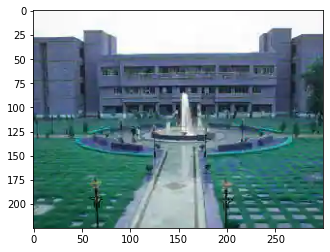

In [13]:
img = cv2.imread('BTPreport/NSUT_BTP.jpg')
plt.imshow(img)
plt.show()

67500


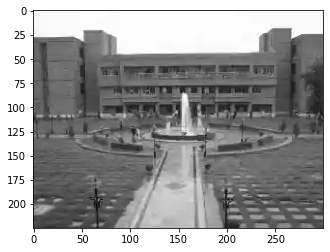

In [14]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img2, cmap = plt.cm.gray)
P = img2.reshape(-1)
row,col = img2.shape[0:2]
print(len(P))

In [15]:
x1,y1,x2,y2 = HSM2D(-0.83, 0.7, 0.4, 0.01, 9.6, 0.7, 0.3, 0.2, row*col)

In [16]:
P_new = diffuseIMG(P, x1,y1,x2,y2)
C = permuteIMG(P, P_new,x1)

In [19]:
 from PIL import Image
img_array = np.asarray(C).reshape([row,col])
ecrimg = Image.fromarray(img_array)
ecrimg.show()

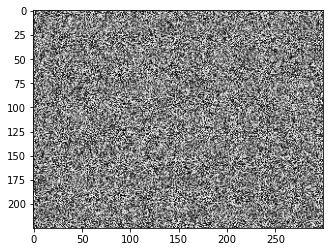

In [20]:
plt.imshow(ecrimg)

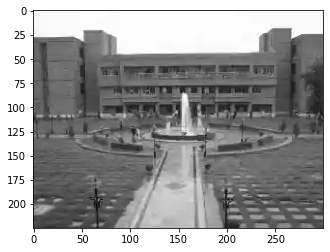

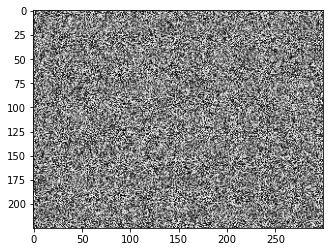

In [21]:
plt.imshow(img2, cmap = plt.cm.gray)
plt.show()
plt.imshow(ecrimg)


In [22]:
def decrypt(C,x1,y1,x2,y2):
    Rx = [(round(x * pow(10,4))%8 + 1) for x in x1]
    Ry = [(round(y * pow(10,4))%8 + 1) for y in y1]
    Rz = [(round(x * pow(10,4))%8 + 1) for x in x2]
    R = [(round(y * pow(10,4))%256) for y in y2]
    S = [round(x * pow(10,4))%(len(P)) for x in x1]
    ind = []
    for i in range(len(C)):
        ind.append(i)
        
    for i in range(len(C)):
        for j in range(len(C)):
            if(S[i]>S[j]):
                S[i],S[j] = S[j], S[i]
                ind[i],ind[j] = ind[j],ind[i]
   
    Dd = np.zeros(len(C))

    for i in range(len(C)):
        Dd[i] = C[ind[i]]
    
    DNAr = DNAencode(Rz, R)
    
    decIMG = np.zeros(len(C))
    
    decIMG[0]  = Dd[0]
    for i in range(1, len(C)):
        temp = Dd[i-1]
        decIMG[i] = int(Dd[i]) ^ int(temp)
        encD = DNAencode1(Rx[i], decIMG[i])
        xorD = DNAXOR1(encD, DNAr[i])
        decIMG[i] = DNAdecode1(Ry[i],xorD)
    
    return decIMG

In [23]:
D = decrypt(C,x1,y1,x2,y2)
print(D)

[ 65. 248. 248. ...  69.  68.  67.]


In [25]:
img_array1 = np.asarray(D).reshape([row,col])
decimg = Image.fromarray(img_array1)

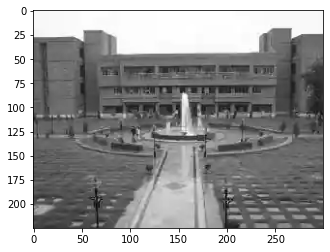

In [26]:
plt.imshow(decimg)

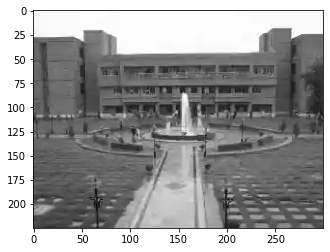

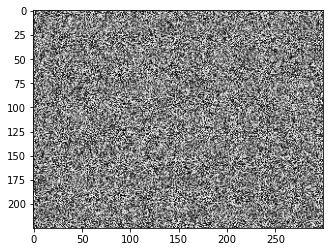

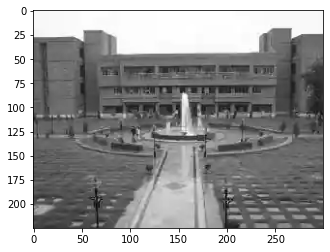

In [33]:
plt.imshow(img2, cmap = plt.cm.gray )
plt.show()
plt.imshow(ecrimg)
plt.show()
plt.imshow(decimg)
plt.show()

In [58]:
def uaci(img1, img2):
    
    height, width = img1.shape[0:2]
    value = 0
    for x in range(height):
        for y in range (width):
            value = value + abs(int(img1[x,y]) - int(img2[x,y]))
    value = value * 100/(width * height * 255)
    return value


In [59]:
print('UACI: ', uaci(asarray(img2), asarray(ecrimg)))

UACI:  30.934297748729122


In [63]:
def npcr(img1, img2):
    height,width = img1.shape[0:2]
    npcrv = ((sum_pixel_val(height, width, img1, img2)/(height*width))*100)
    return npcrv

In [80]:
def sum_pixel_val(height, width, img1, img2):
    matrix = np.empty([height,width])
    for x in range(height):
        for y in range(width):
            if img1[x,y] == img2[x,y]:
                matrix[x,y]=0
            else:
                matrix[x,y]=1
    
    sum=0
    for x in range(height):
        for y in range(width):
            sum = matrix[x,y] + sum
    return sum


In [81]:
from numpy import asarray
print('NPCR: ', npcr(asarray(img2), asarray(ecrimg)))


NPCR:  99.60444444444444


In [94]:
def histogram(img):
    
    pixels=[]

    for x in range(256):
        pixels.append(x)
  
    width, height=img.shape[0:2]
    
    counts=[]
  
    for i in pixels:
        temp=0


        for x in range(width):
            for y in range(height):
                if (img[x,y]==i):
                    temp=temp+1

        counts.append(temp)
  

    plt.bar(pixels,counts)
    plt.show()

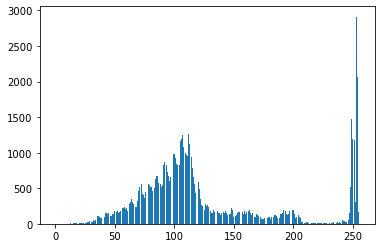

In [95]:
histogram(asarray(img2))

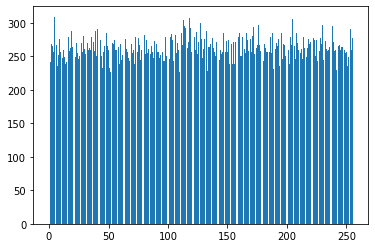

In [96]:
histogram(asarray(ecrimg))